In [1]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import re
import string

c:\Users\prans\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("Dataset/CSV/edos_labelled_aggregated.csv")
df_2 = pd.read_csv("Dataset/CSV/edos_labelled_individual_annotations.csv")

### Visualization

<Axes: xlabel='label_sexist'>

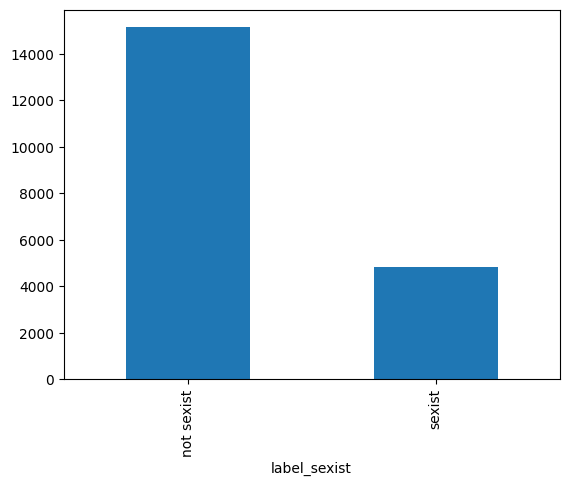

In [5]:
df["label_sexist"].value_counts().plot(kind='bar')

<Axes: xlabel='label_sexist'>

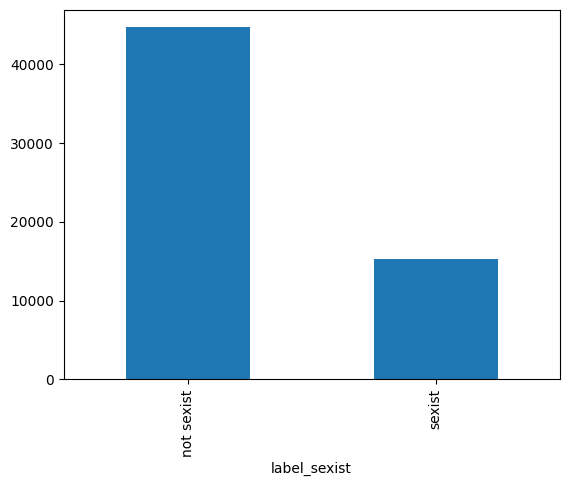

In [4]:
# bar graph of label sexist
df_2['label_sexist'].value_counts().plot(kind='bar')

In [6]:
df_2_sexisms = df_2[df_2['label_sexist'] == 'sexist']
df_2_nonsexisms = df_2[df_2['label_sexist'] == 'not sexist']

In [7]:
df_2_nonsexisms = df_2_nonsexisms.sample(n=7000, random_state=42)

In [8]:
df_2_sexisms = df_2_sexisms[['text', 'label_sexist' , 'split']]
df_2_nonsexisms = df_2_nonsexisms[['text', 'label_sexist' , 'split']]
df = df[['text', 'label_sexist' , 'split']]
df_final = pd.concat([df , df_2_sexisms, df_2_nonsexisms])

In [9]:
df = df_final.copy()

<Axes: xlabel='label_sexist'>

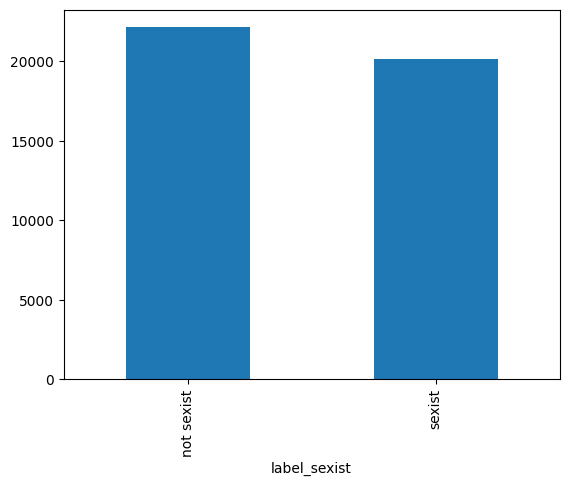

In [11]:
# final after non-imbalance
df['label_sexist'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Label Sexist Final')

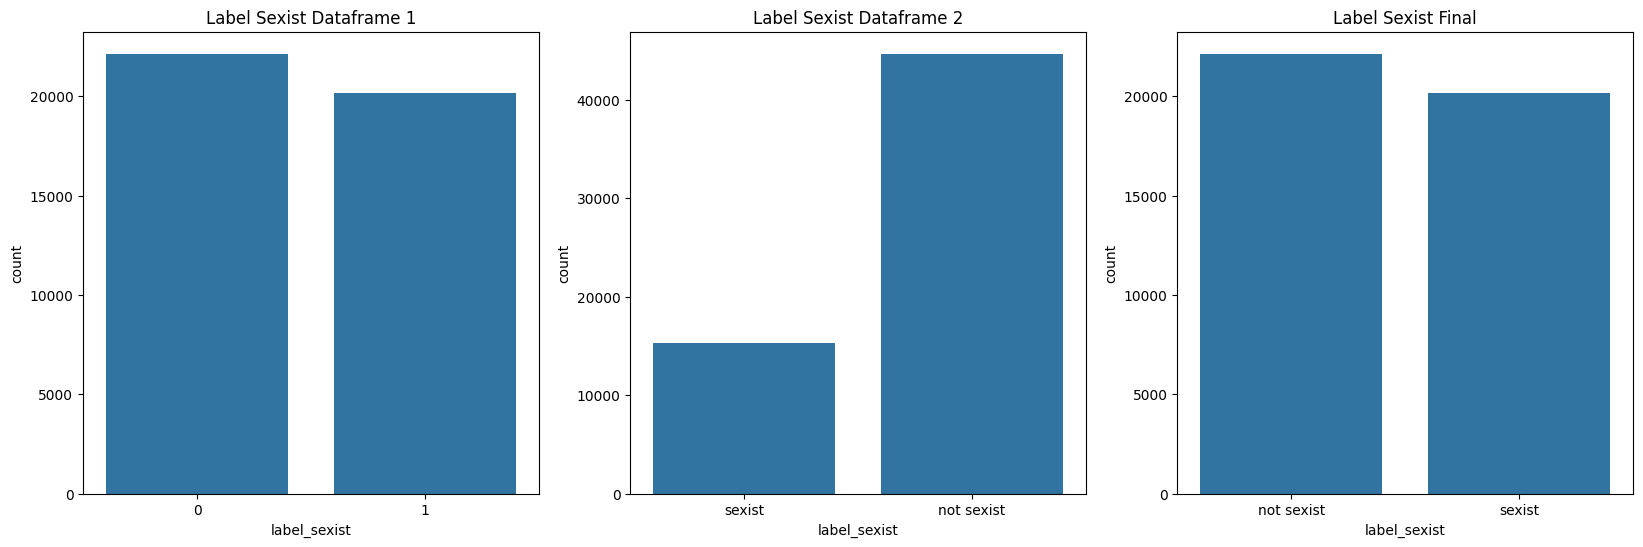

In [30]:
# make grid of all three bar graph
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x='label_sexist', data=df, ax=axes[0])
axes[0].set_title('Label Sexist Dataframe 1')

sns.countplot(x='label_sexist', data=df_2, ax=axes[1])
axes[1].set_title('Label Sexist Dataframe 2')

sns.countplot(x='label_sexist', data=df_final, ax=axes[2])
axes[2].set_title('Label Sexist Final')

In [10]:
df.isna().sum()

text            0
label_sexist    0
split           0
dtype: int64

In [12]:
df["label_sexist"] = df["label_sexist"].map({"sexist": 1, "not sexist": 0})

In [13]:
df.head()

text  label_sexist  split
0  In Nigeria, if you rape a woman, the men rape ...             0    dev
1                            Then, she's a keeper. 😉             0  train
2  This is like the Metallica video where the poo...             0  train
3                                             woman?             0  train
4                     I bet she wished she had a gun             0    dev

In [14]:
df["label_sexist"].value_counts()

label_sexist
0    22146
1    20184
Name: count, dtype: int64

## Preprocessing

In [15]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [16]:
def special_characters(text):

    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"JapÌ_n", "Japan", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"mÌ¼sica", "music", text)
    text = re.sub(r"donå«t", "do not", text)
    text = re.sub(r"didn`t", "did not", text)
    text = re.sub(r"i\x89Ûªm", "I am", text)
    text = re.sub(r"I\x89Ûªm", "I am", text)
    text = re.sub(r"it\x89Ûªs", "it is", text)
    text = re.sub(r"It\x89Ûªs", "It is", text)
    text = re.sub(r"i\x89Ûªd", "I would", text)
    text = re.sub(r"I\x89Ûªd", "I would", text)
    text = re.sub(r"i\x89Ûªve", "I have", text)
    text = re.sub(r"I\x89Ûªve", "I have", text)
    text = re.sub(r"let\x89Ûªs", "let us", text)
    text = re.sub(r"don\x89Ûªt", "do not", text)
    text = re.sub(r"Don\x89Ûªt", "Do not", text)
    text = re.sub(r"can\x89Ûªt", "cannot", text)
    text = re.sub(r"Can\x89Ûªt", "Cannot", text)
    text = re.sub(r"that\x89Ûªs", "that is", text)
    text = re.sub(r"That\x89Ûªs", "That is", text)
    text = re.sub(r"here\x89Ûªs", "here is", text)
    text = re.sub(r"Here\x89Ûªs", "Here is", text)
    text = re.sub(r"you\x89Ûªre", "you are", text)
    text = re.sub(r"You\x89Ûªre", "You are", text)
    text = re.sub(r"you\x89Ûªve", "you have", text)
    text = re.sub(r"You\x89Ûªve", "You have", text)
    text = re.sub(r"you\x89Ûªll", "you will", text)
    text = re.sub(r"You\x89Ûªll", "You will", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"doesn\x89Ûªt", "does not", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"åÀ", "", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"Ì©", "", text)

    text = re.sub(r"&lt;", "<", text)
    text = re.sub(r"&gt;", ">", text)
    text = re.sub(r"&amp;", "&", text)
    return text


def remove_nonASCII(text):
    text = ''.join([x for x in text if x in string.printable])
    return text

In [17]:
def specific_corrections(text):

    text = re.sub(r"b/c", "because", text)
    text = re.sub(r"w/e", "whatever", text)
    text = re.sub(r"w/out", "without", text)
    text = re.sub(r"w/o", "without", text)
    text = re.sub(r"w/", "with ", text)
    text = re.sub(r"<3", "love", text)
    text = re.sub(r"c/o", "care of", text)
    text = re.sub(r"p/u", "pick up", text)
    text = re.sub(r"\n", " ", text)

    text = re.sub(r"Trfc", "Traffic", text)
    text = re.sub(r"recentlu", "recently", text)
    text = re.sub(r"Ph0tos", "Photos", text)
    text = re.sub(r"exp0sed", "exposed", text)
    text = re.sub(r"amageddon", "armageddon", text)
    text = re.sub(r"TRAUMATISED", "traumatized", text)
    text = re.sub(r"Newss", "News", text)
    text = re.sub(r"remedyyyy", "remedy", text)
    text = re.sub(r"Bstrd", "bastard", text)
    text = re.sub(r"bldy", "bloody", text)
    text = re.sub(r"epicenterr", "epicenter", text)
    text = re.sub(r"approachng", "approaching", text)
    text = re.sub(r"evng", "evening", text)
    text = re.sub(r"Sumthng", "something", text)
    text = re.sub(r"kostumes", "costumes", text)
    text = re.sub(r"glowng", "glowing", text)
    text = re.sub(r"kindlng", "kindling", text)
    text = re.sub(r"riggd", "rigged", text)
    text = re.sub(r"HLPS", "helps", text)
    text = re.sub(r"SNCTIONS", "sanctions", text)
    text = re.sub(r"Politifiact", "PolitiFact", text)
    text = re.sub(r"Kowing", "Knowing", text)
    text = re.sub(r"wrld", "world", text)
    text = re.sub(r"shld", "should", text)
    text = re.sub(r"thruuu", "through", text)
    text = re.sub(r"probaly", "probably", text)
    text = re.sub(r"whatevs", "whatever", text)
    text = re.sub(r"colomr", "colour", text)
    text = re.sub(r"pileq", "pile", text)
    text = re.sub(r"firefightr", "firefighter", text)
    text = re.sub(r"LAIGHIGN", "laughing", text)
    text = re.sub(r"EXCLUSIV", "Exclusive", text)
    text = re.sub(r"belo-ooow", "below", text)
    text = re.sub(r"who-ooo-ole", "whole", text)
    text = re.sub(r"brother-n-law", "father-in-law", text)
    text = re.sub(r"referencereference", "reference", text)

    return text

In [18]:
def expand_contractions(text):

    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"I'M", "I am", text)
    text = re.sub(r"i'm", "I am", text)
    text = re.sub(r"i'M", "I am", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"I'd", "I would", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"I'll", "I will", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"I've", "I have", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"You're", "You are", text)
    text = re.sub(r"you'd", "you would", text)
    text = re.sub(r"You'd", "You would", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"You've", "You have", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"You'll", "You will", text)
    text = re.sub(r"y'know", "you know", text)
    text = re.sub(r"Y'know", "You know", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"Y'all", "You all", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"We're", "We are", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"We've", "We have", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"We'd", "We would", text)
    text = re.sub(r"WE'VE", "We have", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"We'll", "We will", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"They're", "They are", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"They'd", "They would", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"They've", "They have", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"They'll", "They will", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"He's", "He is", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"He'll", "He will", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"She's", "She is", text)
    text = re.sub(r"she'll", "she will", text)
    text = re.sub(r"She'll", "She will", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"It'll", "It will", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"Isn't", "Is not", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"Who's", "Who is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"That's", "That is", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"Here's", "Here is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"There's", "There is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"Where's", "Where is", text)
    text = re.sub(r"wHeRE's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"How's", "How is", text)
    text = re.sub(r"how're", "how are", text)
    text = re.sub(r"How're", "How are", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"Let's", "Let us", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"Haven't", "Have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"Ain't", "am not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"Don't", "do not", text)
    text = re.sub(r"DON'T", "Do not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"Didn't", "Did not", text)
    text = re.sub(r"DIDN'T", "Did not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"Can't", "Cannot", text)
    text = re.sub(r"Could've", "Could have", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"would've", "would have", text)

    return text

In [19]:
def remove_non_alnum(text):
    punctuation = re.compile('[^A-Za-z0-9]+')
    return punctuation.sub(r' ', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


def remove_extra_spaces(text):
    text = re.sub('\s+', ' ', text).strip()
    return text

In [20]:
# first remove all the characters except the alphabets
import re
import random


def prep_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Removing the links
    text = re.sub(r'#\w+', '', text)  # removing the hashtags
    text = re.sub(r'@\w+', '', text)  # removing the mentions @
    text = re.sub(r'[^a-z ]', '', text)  # removing characters other than a-z
    text = remove_emoji(text)  # removing the emojis
    text = remove_html(text)  # removing the html tags
    text = remove_punct(text)  # removing the punctuations
    text = specific_corrections(text)  # correcting some specific words
    text = expand_contractions(text)  # expanding the contractions
    text = remove_nonASCII(text)  # removing the non-ascii characters
    text = special_characters(text)  # removing the special characters
    text = remove_non_alnum(text)  # removing the non-alphanumeric characters
    text = remove_extra_spaces(text)  # removing the extra spaces
    text = text.strip()  # removing the whitespaces

    return text


sample = df["text"].sample(random_state=42).values[0]
print(f"Sample sentence :\n{sample}\n")
print(f"Preprocessed sentence :")
print(prep_text(sample))

Sample sentence :
Women of an earlier decade were taught about proper "consent". [URL] The problem with women is they want the hookup culture to seek Alphas, bu want the puriticanal prudery otherwise.

Preprocessed sentence :
women of an earlier decade were taught about proper consent url the problem with women is they want the hookup culture to seek alphas bu want the puriticanal prudery otherwise


In [21]:
df["text"] = df["text"].apply(prep_text)

In [22]:
df.head()

text  label_sexist  split
0  in nigeria if you rape a woman the men rape yo...             0    dev
1                                 then shes a keeper             0  train
2  this is like the metallica video where the poo...             0  train
3                                              woman             0  train
4                     i bet she wished she had a gun             0    dev

### Word Cloud

In [24]:
# sexist texts word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_sexist = df[df["label_sexist"] == 1]
df_sexist_text = " ".join(df_sexist["text"].values)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(df_sexist_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

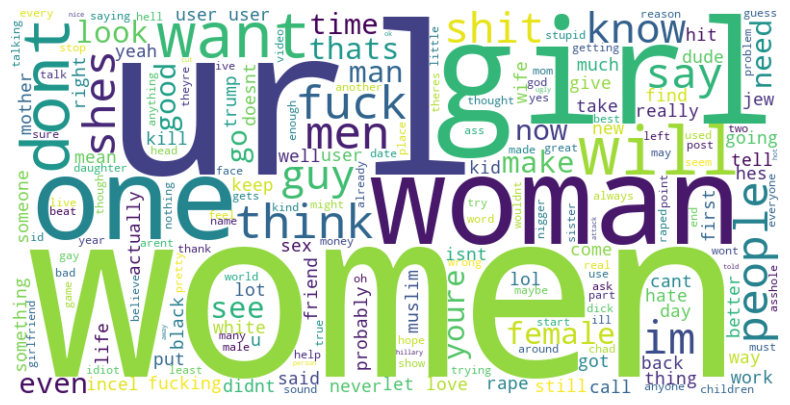

In [26]:
# non-sexist texts word cloud
df_non_sexist = df[df["label_sexist"] == 0]
df_non_sexist_text = " ".join(df_non_sexist["text"].values)
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(df_non_sexist_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
df_train = df[df["split"] == "train"]
df_val = df[df["split"] == "dev"]
df_test = df[df["split"] == "test"]

In [20]:
df = df.drop(columns=["split"])

In [23]:
X_train = df_train["text"]
y_train = df_train["label_sexist"]

In [22]:
df_train = df_train.drop(columns=["split"])
df_val = df_val.drop(columns=["split"])
df_test = df_test.drop(columns=["split"])

## Models

### Simple Neural Network

In [24]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import pandas as pd

In [25]:
# ✅ Load Google's Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


def get_embeddings(texts):
    return use_model(texts).numpy()


# Example:
sample_texts = ["This is a test sentence.",
                "Sexist comments should be flagged."]
embeddings = get_embeddings(sample_texts)

print(embeddings.shape)

(2, 512)


In [43]:
# Convert text data to embeddings
X_train_embeddings = get_embeddings(df_train["text"].tolist())

# Convert labels to NumPy array
y_train = df_train["label_sexist"].values

# Print shape
print("X_train shape:", X_test_embeddings.shape)  # (num_samples, 512)
print("y_train shape:", y_train.shape)  # (num_samples,)

X_train shape: (8527, 512)
y_train shape: (29574,)


In [44]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# 📌 Define an Optimized Neural Network for USE Embeddings
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(512,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Binary classification output
])


def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        return K.mean(alpha * K.pow(1 - p_t, gamma) * bce)
    return loss


# class_weights = {0: 1.0, 1: 3.0}
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,081 (680.00 KB)

 Trainable params: 173,313 (677.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [49]:
# 🚀 Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Track validation loss
    patience=5,          # Stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True  # Restore best model weights
)

# Convert validation data to embeddings
X_val_embeddings = get_embeddings(df_val["text"].tolist())
y_val = df_val["label_sexist"].values

# 📌 Train the Model with Validation
history = model.fit(
    X_train_embeddings, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_embeddings, y_val),
    verbose=1,
    # class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - binary_accuracy: 0.7949 - loss: 0.4310 - val_binary_accuracy: 0.7456 - val_loss: 0.5315
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.8170 - loss: 0.3932 - val_binary_accuracy: 0.7432 - val_loss: 0.5414
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.8335 - loss: 0.3744 - val_binary_accuracy: 0.7314 - val_loss: 0.5771
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.8453 - loss: 0.3519 - val_binary_accuracy: 0.7345 - val_loss: 0.5824
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.8548 - loss: 0.3382 - val_binary_accuracy: 0.7444 - val_loss: 0.5758
Epoch 6/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.8613 - loss: 0.3200 - val_binary_accuracy: 0.7387 - val_loss: 0.5900


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      4442
           1       0.74      0.68      0.71      4085

    accuracy                           0.73      8527
   macro avg       0.73      0.73      0.73      8527
weighted avg       0.73      0.73      0.73      8527



<Axes: >

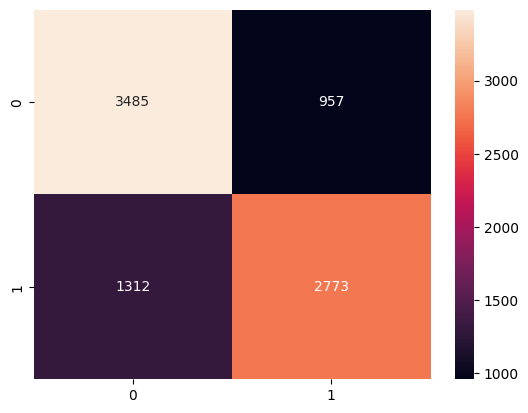

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Testing
X_test_embeddings = get_embeddings(df_test["text"].tolist())
y_test = df_test["label_sexist"].values

y_preds = model.predict(X_test_embeddings)

y_preds = (y_preds > 0.5).astype(int)

print(classification_report(y_test, y_preds))

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d')

In [57]:
import numpy as np

# Ensure both arrays are NumPy arrays
y_test = np.array(y_test)
y_preds = np.array(y_preds).ravel()  # Flatten (N, 1) -> (N,)

# Compute accuracy correctly
accuracy = (y_test == y_preds).sum() / len(y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")  # Rounded to 2 decimal places

Accuracy: 73.39%


In [59]:
sample_text_sexims = "I bet she wished she had a gun"

sample_text_sexims = prep_text(sample_text_sexims)
sample_text_sexims_embedding = get_embeddings([sample_text_sexims])

model.predict(sample_text_sexims_embedding)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.22920376]], dtype=float32)

In [67]:
import numpy as np
import lime.lime_tabular

# 🚀 Use USE embeddings for LIME
X_train_embeddings_for_lime = get_embeddings(X_train.tolist())  # Get embeddings for training data

# 🚀 Create LIME explainer with embeddings
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_embeddings_for_lime,  # Use USE embeddings
    feature_names=[f"embedding_{i}" for i in range(X_train_embeddings_for_lime.shape[1])],  # Name embedding features
    class_names=['Non-Sexist', 'Sexist'],
    mode='classification'
)

# Ensure model_predict_proba works with embeddings
def model_predict_proba(X):
    return np.hstack((1 - model.predict(X), model.predict(X)))

# Explain a single example
i = 5  # Example index
# 🚀 Get USE embeddings for the instance to explain
instance_embeddings = get_embeddings([df_test.iloc[i]["text"]])

exp = lime_explainer.explain_instance(
    instance_embeddings[0],  # Use embeddings for the instance
    model_predict_proba,
    num_features=10
)
exp.show_in_notebook()  # Show explanation in Jupyter notebook

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Spike Neural Network

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from norse.torch import LIFCell, SequentialState
from transformers import BertTokenizer, BertModel

/usr/local/lib/python3.11/dist-packages/torch/utils/_cxx_pytree.py:235: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(
/usr/local/lib/python3.11/dist-packages/torch/utils/_cxx_pytree.py:235: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFBoxParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(


In [72]:
class ExtendedSpikingTextClassifier(nn.Module):
    def __init__(self):
        super(ExtendedSpikingTextClassifier, self).__init__()
        self.model = SequentialState(
            # Linear layer input_dim=768 (BERT embedding dim), output_dim=256
            nn.Linear(512, 256),
            LIFCell(),            # Spiking activation layer
            nn.Linear(256, 64),   # Linear layer input_dim=256, output_dim=64
            LIFCell(),            # Spiking activation layer
            nn.Linear(64, 1),     # Linear layer input_dim=64, output_dim=1
            LIFCell(),            # Spiking activation layer
        )

    def forward(self, x):
        output, state = self.model(x)
        return output


# Instantiate the model, define loss and optimizer
model = ExtendedSpikingTextClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [73]:
# 🚀 Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert training data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train_embeddings).float().to(device)
y_train_tensor = torch.tensor(y_train).float().to(device)

# Create Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training Loop
for epoch in range(100):
    model.train()  # Set model to training mode
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(
            device)  # Move to GPU/CPU

        optimizer.zero_grad()
        outputs = model(inputs)  # Get raw outputs (logits)
        outputs = outputs.squeeze(1)  # Ensure correct shape

        # Apply sigmoid for BCELoss
        loss = criterion(torch.sigmoid(outputs), labels)
        loss.backward()
        optimizer.step()

    if i % 10 == 0:
        print(f"Epoch: {epoch}, Step: {i}, Loss: {loss.item()}")

Accuracy: 0.6947343731675854
              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75      4442
         1.0       0.80      0.49      0.61      4085

    accuracy                           0.69      8527
   macro avg       0.72      0.69      0.68      8527
weighted avg       0.72      0.69      0.68      8527



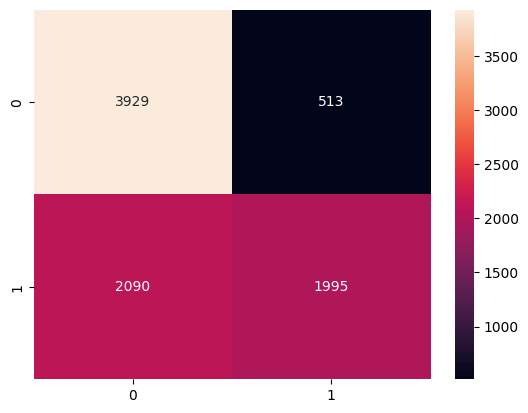

In [74]:
# accuracy on test data

X_test_tensor = torch.tensor(X_test_embeddings).float().to(device)
y_test_tensor = torch.tensor(y_test).float().to(device)

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    outputs = model(X_test_tensor)
    outputs = outputs.squeeze(1)  # Ensure correct shape
    predictions = torch.sigmoid(outputs) > 0.5
    accuracy = (predictions == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test_tensor.cpu(), predictions.cpu()))
    sns.heatmap(confusion_matrix(y_test_tensor.cpu(), predictions.cpu()), annot=True, fmt='d')

In [78]:
import numpy as np
import lime.lime_tabular
import torch  # Import torch

# 🚀 Use USE embeddings for LIME
X_train_embeddings_for_lime = get_embeddings(
    X_train.tolist())  # Get embeddings for training data

# 🚀 Create LIME explainer with embeddings
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_embeddings_for_lime,  # Use USE embeddings
    feature_names=[
        f"embedding_{i}" for i in range(X_train_embeddings_for_lime.shape[1])
    ],  # Name embedding features
    class_names=['Non-Sexist', 'Sexist'],
    mode='classification'
)


# Ensure model_predict_proba works with embeddings
def model_predict_proba(X):
    # 🚀 Convert NumPy array to PyTorch tensor and move to device
    X_tensor = torch.tensor(X).float().to(device)
    # 🚀 Get model output and detach from computation graph
    with torch.no_grad():
        output = model(X_tensor)
    # 🚀 Convert output to NumPy array for LIME
    output_np = output.cpu().detach().numpy()
    return np.hstack((1 - output_np, output_np))


# Explain a single example
i = 5  # Example index
# 🚀 Get USE embeddings for the instance to explain
instance_embeddings = get_embeddings([df_test.iloc[89]["text"]])

exp = lime_explainer.explain_instance(
    instance_embeddings[0],  # Use embeddings for the instance
    model_predict_proba,
    num_features=10
)
exp.show_in_notebook()  # Show explanation in Jupyter notebook

### BERT LLM

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(
    "NLP-LTU/bertweet-large-sexism-detector")
model = AutoModelForSequenceClassification.from_pretrained(
    "NLP-LTU/bertweet-large-sexism-detector")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def mc_dropout_predict(model, input_ids, attention_mask, n=10):
    model.train()  # Enable dropout
    preds = []
    for _ in range(n):
        with torch.no_grad():
            logits = model(input_ids=input_ids,
                           attention_mask=attention_mask).logits
            preds.append(torch.softmax(logits, dim=-1).cpu().numpy())
    return np.mean(preds, axis=0), np.std(preds, axis=0)  # mean, uncertainty

In [ ]:
# training arguments

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",  # Save model checkpoints
    per_device_train_batch_size=16,  # Increase batch size if GPU has enough memory
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=2,
    num_train_epochs=1,
    evaluation_strategy="steps",
    drop_out_method=mc_dropout_predict,
    eval_steps=10,
    save_steps=10,
    save_total_limit=1,
    load_best_model_at_end=True,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True,  # Enables mixed precision training for faster computation
    report_to="none"  # Disable logging to WandB (optional)
)


# Prepare the dataset
from datasets import Dataset

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

train_dataset = train_dataset.rename_column("label_sexist", "labels")
val_dataset = val_dataset.rename_column("label_sexist", "labels")
test_dataset = test_dataset.rename_column("label_sexist", "labels")


c:\Users\prans\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
max_length = 64  # Ensure consistent sequence length

train_dataset = train_dataset.map(lambda x: tokenizer(
    x["text"], truncation=True, padding='max_length', max_length=max_length), batched=True)

val_dataset = val_dataset.map(lambda x: tokenizer(
    x["text"], truncation=True, padding='max_length', max_length=max_length), batched=True)

test_dataset = test_dataset.map(lambda x: tokenizer(
    x["text"], truncation=True, padding='max_length', max_length=max_length), batched=True)

Map: 100%|██████████| 8527/8527 [00:00<00:00, 13604.08 examples/s]


In [ ]:
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

In [ ]:
import torch
import torch.nn as nn
from transformers import Trainer
import torch.nn.functional as F


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Focal Loss Implementation
        gamma = 2.0  # focusing parameter
        alpha = 0.75  
        # Convert logits to probabilities
        probs = F.softmax(logits, dim=-1)
        # probs corresponding to true class
        pt = probs[range(len(labels)), labels]

        # Calculate the focal loss
        focal_loss = -alpha * (1 - pt) ** gamma * torch.log(pt + 1e-8)
        loss = focal_loss.mean()

        return (loss, outputs) if return_outputs else loss

In [ ]:
from transformers import BertPreTrainedModel, BertModel
import torch.nn as nn


class MultiTaskBERT(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        self.dropout = nn.Dropout(0.3)
        self.classifier_bias = nn.Linear(
            config.hidden_size, 2)         # Bias Detection
        self.classifier_sentiment = nn.Linear(
            config.hidden_size, 3)    # Sentiment (pos/neu/neg)
        self.classifier_sarcasm = nn.Linear(
            config.hidden_size, 2)      # Sarcasm (yes/no)
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = self.dropout(outputs.pooler_output)
        bias_logits = self.classifier_bias(pooled_output)
        sentiment_logits = self.classifier_sentiment(pooled_output)
        sarcasm_logits = self.classifier_sarcasm(pooled_output)
        return (bias_logits, sentiment_logits, sarcasm_logits)

In [ ]:
import wandb
from transformers import Trainer
wandb.init(mode="disabled")

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,  # Ensures text tokenization consistency
)

trainer.train()  # Start training


<ipython-input-130-6c5185e5c58a>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


TrainOutput(global_step=924, training_loss=0.3827483953335585, metrics={'train_runtime': 9101.7964, 'train_samples_per_second': 3.249, 'train_steps_per_second': 0.102, 'total_flos': 3444418318860288.0, 'train_loss': 0.3827483953335585, 'epoch': 0.9994591671173607})

In [ ]:
trainer.save_model("saved_model")

In [ ]:
model.save_pretrained("saved_model_pp")
tokenizer.save_pretrained("saved_model_pp_t")

('saved_model_pp_t/tokenizer_config.json',
 'saved_model_pp_t/special_tokens_map.json',
 'saved_model_pp_t/vocab.json',
 'saved_model_pp_t/merges.txt',
 'saved_model_pp_t/added_tokens.json',
 'saved_model_pp_t/tokenizer.json')

In [ ]:
max_length = 64  # Ensure consistent sequence length

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length', max_length=max_length)

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/29574 [00:00<?, ? examples/s]

Map:   0%|          | 0/4229 [00:00<?, ? examples/s]

Map:   0%|          | 0/8527 [00:00<?, ? examples/s]

### Prediction using Trained Model

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("saved_model")
tokenizer = AutoTokenizer.from_pretrained("saved_model")

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=Tru

In [ ]:
def preprocess(text):
    return tokenizer(text, truncation=True, padding="max_length", max_length=64, return_tensors="pt")

In [ ]:
def predict(text):
    inputs = preprocess(text)
    # Move to GPU if available
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(**inputs)

    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(
        logits, dim=-1)  # Convert to probabilities
    predicted_class = torch.argmax(
        probabilities, dim=1).item()  # Get predicted label

    return predicted_class, probabilities.tolist()


In [ ]:
# Example usage
text = "Women are made for love."  # Example input
label, probs = predict(text)
print(f"Predicted label: {label}, Probabilities: {probs}")

Predicted label: 0, Probabilities: [[0.562232255935669, 0.43776771426200867]]


In [ ]:
# find the recall and precision of the model

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

df_test_sample = df_test.sample(1000, random_state=42)
X_test_sample = df_test_sample["text"]
y_test_sample = df_test_sample["label_sexist"]

y_preds = []

for text in X_test_sample:
    label, _ = predict(text)
    y_preds.append(label)


print(classification_report(y_test_sample, y_preds))
sns.heatmap(confusion_matrix(y_test_sample, y_preds), annot=True, fmt='d')

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       533
           1       0.91      0.69      0.78       467

    accuracy                           0.82      1000
   macro avg       0.84      0.81      0.81      1000
weighted avg       0.84      0.82      0.82      1000



<Axes: >

In [ ]:
# Accuracy
accuracy = (y_test_sample == y_preds).sum() / len(y_test_sample)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 82.1%


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from captum.attr import IntegratedGradients
import numpy as np

# ✅ Load model and tokenizer
model_name = "saved_model"  # Update with your actual model path
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# ✅ Move Model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ✅ Function to preprocess input


def encode_text(text):
    encoding = tokenizer(text, return_tensors="pt",
                         truncation=True, padding=True, max_length=128)
    input_ids = encoding["input_ids"].to(device)
    attention_mask = encoding["attention_mask"].to(device)
    return input_ids, attention_mask

# ✅ Custom forward function for Captum


def model_forward(embeddings, attention_mask):
    """
    Custom function that takes word embeddings instead of input_ids.
    """
    output = model(inputs_embeds=embeddings, attention_mask=attention_mask)
    return output.logits  # Keep raw logits, no softmax


# ✅ Example sexist text
text = "Women should stay in the kitchen where they belong"
text = prep_text(text)
input_ids, attention_mask = encode_text(text)

# Convert input_ids to embeddings
with torch.no_grad():
    embeddings = model.get_input_embeddings()(input_ids)

# Enable gradients for embeddings
embeddings.requires_grad_(True)

# 🚀 Use Integrated Gradients with explicit target
ig = IntegratedGradients(model_forward)
attributions = ig.attribute(
    embeddings, target=1, additional_forward_args=(attention_mask,)
)

# ✅ Convert attributions to numpy
attr_scores = attributions.squeeze().detach().cpu().numpy()

# ✅ Ensure scalar values for printing
tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze().tolist())
attr_scores = attr_scores.flatten()  # Flatten array to ensure scalars

# ✅ Print token attributions
for token, score in zip(tokens, attr_scores):
    print(f"{token}: {float(score):.4f}")


<s>:  0.0001  
women:  0.0012  
Ġshould:  0.0009  
Ġstay:  -0.0023  
Ġin:  -0.0010  
Ġthe:  0.0004  
Ġkitchen:  0.0035  
Ġwhere:  -0.0012  
Ġthey:  0.0028  
Ġbelong:  -0.0005  
!:  0.0017  
</s>:  -0.0020  



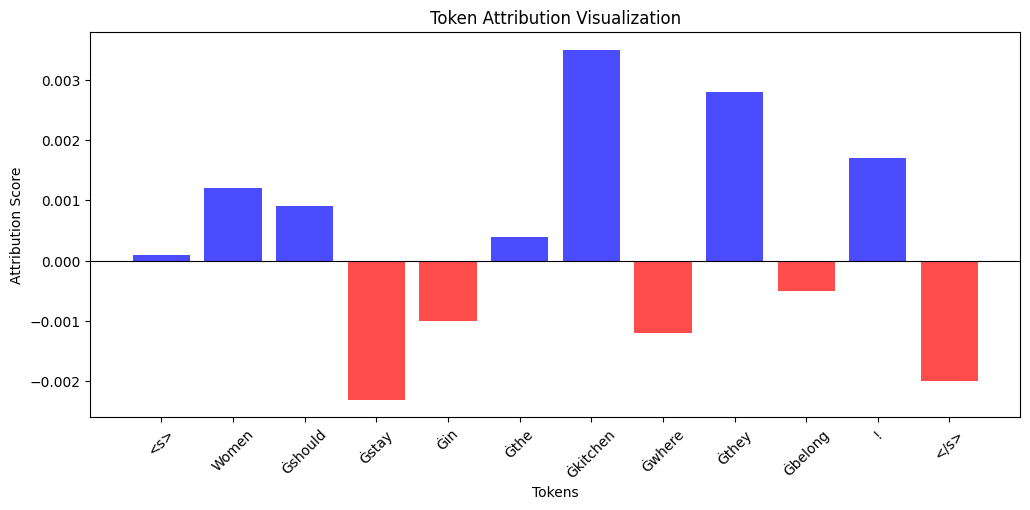

In [ ]:
import matplotlib.pyplot as plt

# Normalize attributions
attr_scores = attr_scores / np.max(np.abs(attr_scores))  # Scale between -1 and 1

# Plot
plt.figure(figsize=(10, 1))
plt.barh(range(len(tokens)), attr_scores, color=[
         'red' if x < 0 else 'blue' for x in attr_scores])
plt.yticks(range(len(tokens)), tokens)
plt.xlabel("Attribution Score")
plt.title("Token-wise Attributions")
plt.show()